In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn import metrics

from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
#full-game data
data = pd.read_csv("Full Game/GrandMaster_Ranked_Games.csv", usecols=range(2, 26))
data.shape

(65896, 24)

In [3]:
data.head()

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,...,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
0,0,0,0,1,1,0,1,1,2,0,...,45,101607,63447,774,80,16.0,226,3,24718,31019
1,0,0,1,0,0,0,0,0,2,0,...,30,70270,47107,601,65,13.0,136,5,20503,31788
2,1,1,1,1,0,1,2,1,10,2,...,88,102449,59163,613,71,14.2,157,7,28612,67404
3,1,0,1,0,1,0,1,0,4,0,...,34,56652,39014,486,57,11.4,115,5,17630,37483
4,1,0,0,0,1,1,3,0,7,1,...,38,57342,42933,509,61,12.2,129,4,13040,48691


# Full Game

## Full Game all features

In [57]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:25], data.iloc[:,0], test_size = 0.3, random_state=0)

In [58]:
#LR model
LR = LogisticRegression(max_iter=500)
LR.fit(x_train, y_train)
#make prediction
prediction = LR.predict(x_test)
accuracy = LR.score(x_test, y_test)
print(accuracy)

0.9497698416713035


/Users/Versace/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
prob = LR.predict_proba(x_test) #probabilities of lable 1 for each prediction
loss1 = log_loss(y_test, prob) #loss of the prediction
print(loss1)

0.13870168978416278


Text(0, 0.5, 'negative')

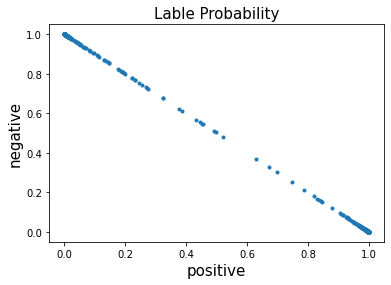

In [61]:
plt.scatter(prob[0:300,0], prob[0:300,1], marker='.')
plt.title("Lable Probability", fontsize = 15)
plt.xlabel('positive', fontsize = 15)
plt.ylabel('negative', fontsize = 15)

In [67]:
count = 0
for i in range(len(prob)):
    if (prob[i,0] > 0.9) or (prob [i,1] > 0.9):
        count+=1
certainty = count/len(prob)
print('Certainty Rate:', certainty)

Certainty Rate: 0.8419242247963984


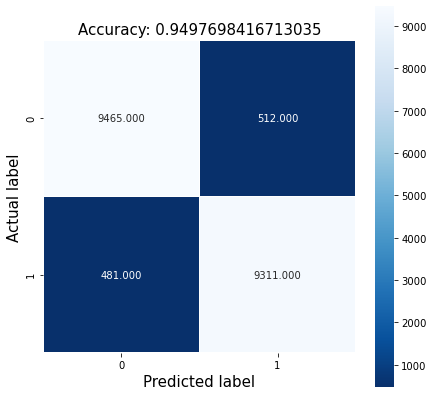

In [69]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', fontsize=15);
plt.xlabel('Predicted label', fontsize=15);
all_sample_title = 'Accuracy: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

## Full Game map control  

In [70]:
#0.7 train, 0.3 test
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,2:12], data.iloc[:,0], test_size = 0.3, random_state=0)

In [71]:
#LR model
LR2 = LogisticRegression(max_iter=500)
#train the model
LR2.fit(x_train, y_train)
#make prediction
prediction2 = LR2.predict(x_test)

In [72]:
#accuracy
accuracy2 = LR2.score(x_test, y_test)
print(accuracy2)

0.8963528757145025


In [73]:
prob = LR2.predict_proba(x_test) #probabilities of lable 1 for each prediction
loss2 = log_loss(y_test, prob) #loss of the prediction
print(loss2)

0.2570995856901654


Text(0, 0.5, 'negative')

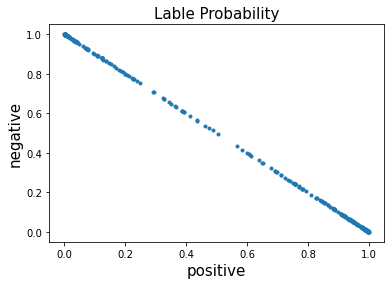

In [75]:
plt.scatter(prob[0:300,0], prob[0:300,1], marker='.')
plt.title("Lable Probability", fontsize = 15)
plt.xlabel('positive', fontsize = 15)
plt.ylabel('negative', fontsize = 15)

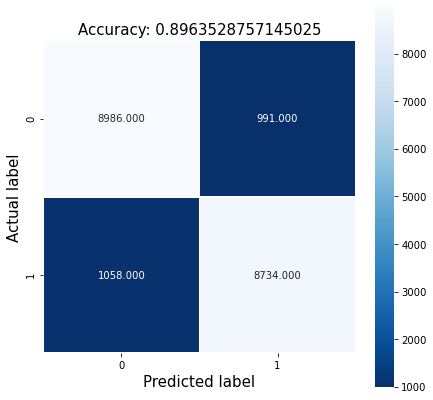

In [45]:
#confusion matrix of the LR model
cm = metrics.confusion_matrix(y_test, prediction2)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', fontsize=15);
plt.xlabel('Predicted label', fontsize=15);
all_sample_title = 'Accuracy: {0}'.format(accuracy2)
plt.title(all_sample_title, size = 15);

## Full Game team fighting & upgrowth 

In [76]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,15:19], data.iloc[:,0], test_size = 0.3, random_state=0)

In [77]:
LR3 = LogisticRegression()
LR3.fit(x_train, y_train)
prediction3 = LR3.predict(x_test)
accuracy3 = LR3.score(x_test, y_test)
print(accuracy3)

0.7191562547422733


In [78]:
prob = LR3.predict_proba(x_test) #probabilities of lable 1 for each prediction
loss3 = log_loss(y_test, prob) #loss of the prediction
print(loss3)

0.5889070114483469


Text(0, 0.5, 'negative')

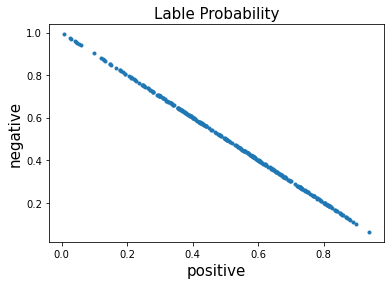

In [80]:
plt.scatter(prob[0:300,0], prob[0:300,1], marker='.')
plt.title("Lable Probability", fontsize = 15)
plt.xlabel('positive', fontsize = 15)
plt.ylabel('negative', fontsize = 15)

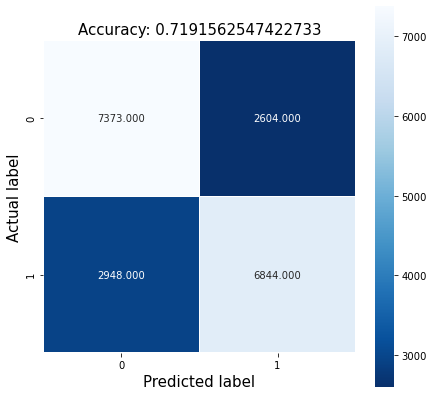

In [50]:
cm = metrics.confusion_matrix(y_test, prediction3)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', fontsize=15);
plt.xlabel('Predicted label', fontsize=15);
all_sample_title = 'Accuracy: {0}'.format(accuracy3)
plt.title(all_sample_title, size = 15);

Text(0, 0.5, 'accuracy')

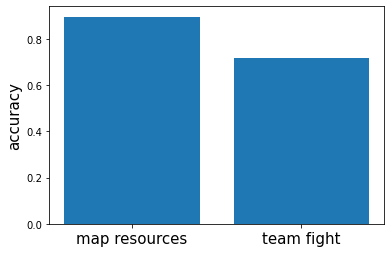

In [86]:
x = [1,2]
plt.bar(x, height=[accuracy2, accuracy3])
plt.xticks(x, ['map resources','team fight'], fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)

Text(0, 0.5, 'loss')

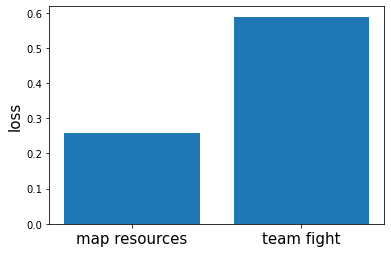

In [82]:
x = [1,2]
plt.bar(x, height=[loss2, loss3])
plt.xticks(x, ['map resources','team fight'], fontsize = 15)
plt.ylabel('loss', fontsize = 15)

In [97]:
df = data[['blueWins', 'blueTowerKills', 'blueChampionDamageDealt', 'blueKills']]
win_towers=0
lose_towers = 0
win_damage=0
lose_damage = 0
win_kills = 0
lose_kills = 0
wins = 0
loses = 0
for i in range(df.shape[0]):
    if df.iloc[i,0] == 1:
        wins += 1
        win_towers += df.iloc[i,1]
        win_damage += df.iloc[i,2]
        win_kills += df.iloc[i,3]
    else:
        loses += 1
        lose_towers += df.iloc[i,1]
        lose_damage += df.iloc[i,2]
        lose_kills += df.iloc[i,3]

In [99]:
win_towers_mean = win_towers/wins
lose_towers_mean = lose_towers/loses
win_damage_mean = win_damage/wins
lose_damage_mean = lose_damage/loses
win_kills_mean = win_kills/wins
lose_kills_mean = lose_kills/loses

Text(0, 0.5, 'tower kills')

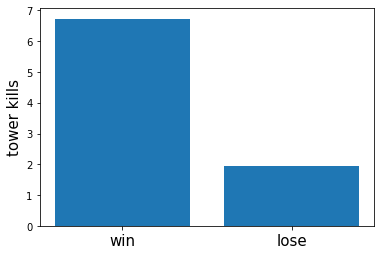

In [101]:
x = [1,2]
plt.bar(x, height=[win_towers_mean, lose_towers_mean])
plt.xticks(x, ['win','lose'], fontsize = 15)
plt.ylabel('tower kills', fontsize = 15)

Text(0, 0.5, 'Champion kills')

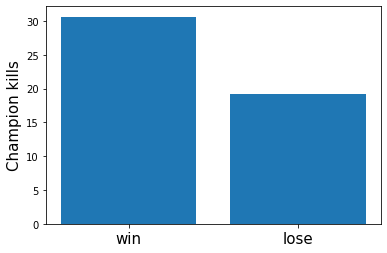

In [102]:
x = [1,2]
plt.bar(x, height=[win_kills_mean, lose_kills_mean])
plt.xticks(x, ['win','lose'], fontsize = 15)
plt.ylabel('Champion kills', fontsize = 15)

Text(0, 0.5, 'damage dealt')

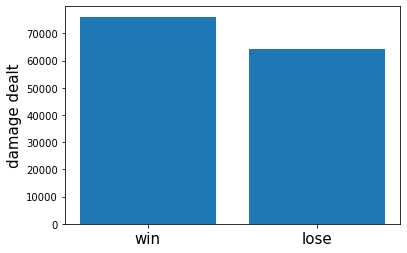

In [103]:
x = [1,2]
plt.bar(x, height=[win_damage_mean, lose_damage_mean])
plt.xticks(x, ['win','lose'], fontsize = 15)
plt.ylabel('damage dealt', fontsize = 15)

# Early Game

## Early Game all features

In [104]:
#data of 10 min early game
data_early = pd.read_csv("high_diamond_ranked_10min.csv", usecols=range(1,21))
data_early.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0


In [107]:
data_early.shape

(9879, 20)

In [105]:
x_train, x_test, y_train, y_test =  train_test_split(data_early.iloc[:,1:21], data_early.iloc[:,0], test_size = 0.3)

In [106]:
LR4 = LogisticRegression()
LR4.fit(x_train, y_train)
prediction4 = LR4.predict(x_test)
accuracy4 = LR4.score(x_test, y_test)
print(accuracy4)

0.7321187584345479


In [109]:
prob = LR4.predict_proba(x_test) #probabilities of lable 1 for each prediction
loss4 = log_loss(y_test, prob) #loss of the prediction
print(loss4)

0.5378644711882199


Text(0, 0.5, 'Probability of negative')

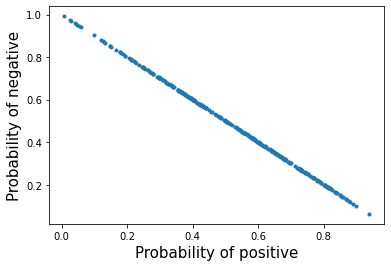

In [108]:
plt.scatter(prob[0:300,0], prob[0:300,1], marker='.')
plt.xlabel('Probability of positive', fontsize = 15)
plt.ylabel('Probability of negative', fontsize = 15)

In [117]:
count = 0
for i in range(len(prob)):
    if (prob[i,0] > 0.9) or (prob [i,1] > 0.9):
        count+=1
certainty = count/len(prob)
print('Certainty Rate:', certainty)

Certainty Rate: 0.1282051282051282


## Early map-control

In [125]:
#data of 10 min early game
map_control = pd.read_csv("high_diamond_ranked_10min.csv", usecols=[1,2,3,8,9,10,11,15,16])
team_fight = pd.read_csv("high_diamond_ranked_10min.csv", usecols=[1,4,5,6,7])
team_fight.head()

,blueWins,blueFirstBlood,blueKills,blueDeaths,blueAssists
0,0,1,9,6,11
1,0,0,5,5,5
2,0,0,7,11,4
3,0,0,4,5,5
4,0,0,6,6,6


In [142]:
x_train, x_test, y_train, y_test =  train_test_split(map_control.iloc[:,1:10], map_control.iloc[:,0], test_size = 0.3)
LR4 = LogisticRegression(max_iter=400)
LR4.fit(x_train, y_train)
prediction4 = LR4.predict(x_test)
accuracy4 = LR4.score(x_test, y_test)
print(accuracy4)

0.631578947368421


In [143]:
prob = LR4.predict_proba(x_test) #probabilities of lable 1 for each prediction
loss4 = log_loss(y_test, prob) #loss of the prediction
print(loss4)

0.6376298649474768


In [144]:
#10-folds cross validation
scores = cross_val_score(LR4, x_train, y_train, cv=10)
scores = pd.Series(scores)
cross_score1 = scores.mean()
print("10-folds Cross Validation Score:", cross_score1)

10-folds Cross Validation Score: 0.6328335828948579


## Early team fight

In [145]:
x_train, x_test, y_train, y_test =  train_test_split(team_fight.iloc[:,1:5], team_fight.iloc[:,0], test_size = 0.3)
LR5 = LogisticRegression(max_iter=200)
LR5.fit(x_train, y_train)
prediction5 = LR5.predict(x_test)
accuracy5 = LR5.score(x_test, y_test)
print(accuracy5)

0.7155870445344129


In [146]:
prob = LR5.predict_proba(x_test) #probabilities of lable 1 for each prediction
loss5 = log_loss(y_test, prob) #loss of the prediction
print(loss5)

0.5571684054951609


In [148]:
#10-folds cross validation
scores = cross_val_score(LR5, x_train, y_train, cv=10)
scores = pd.Series(scores)
cross_score2 = scores.mean()
print("10-folds Cross Validation Score:", cross_score2)

10-folds Cross Validation Score: 0.697758128874129


## comparing

Text(0, 0.5, 'accuracy')

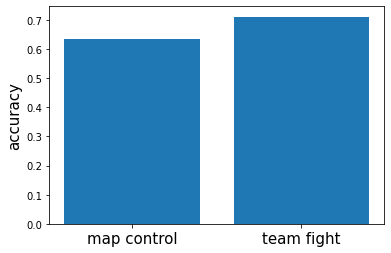

In [137]:
x = [1,2]
plt.bar(x, height=[accuracy4, accuracy5])
plt.xticks(x, ['map control','team fight'], fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)

Text(0, 0.5, 'loss')

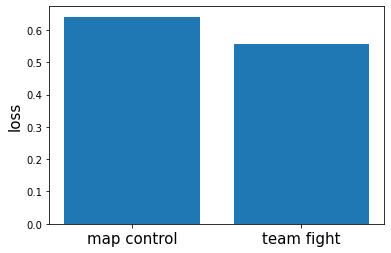

In [138]:
x = [1,2]
plt.bar(x, height=[loss4, loss5])
plt.xticks(x, ['map control','team fight'], fontsize = 15)
plt.ylabel('loss', fontsize = 15)